In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [5]:
!pip install -q pandas matplotlib seaborn sentence-transformers faiss-cpu langchain chromadb

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.3/67.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31.3/31.3 MB 30.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.5/19.5 MB 35.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 284.2/284.2 kB 24.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 64.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Copy of complaints.csv')

# View the first few rows of the data
df.head()



/tmp/ipython-input-1-1602292929.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Copy of complaints.csv')


Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1                              Debt is not yours                          NaN   
2  Reporting company used your report improperly                          NaN   
3  Reporting company used your report improperly                          NaN   
4                       Account status incorrect                          NaN   

                             Company public response  \
0                                                NaN   
1  Company can't verify or dispute the facts in t...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Company State ZIP code Tags  \
0           Experian Information Solutions Inc.    FL    32092  NaN   
1  Eastern Account Systems of Connecticut, Inc.    FL    342XX  NaN   
2        TRANSUNION INTERMEDIATE HOLDINGS, INC.    AZ    85225  NaN   
3           Experian Information Solutions Inc.    AZ    85225  NaN   
4           Experian Information Solutions Inc.    IL    60628  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN           Web           2025-06-20   
1                        NaN           Web           2025-06-20   
2                        NaN           Web           2025-06-20   
3                        NaN           Web           2025-06-20   
4                        NaN           Web           2025-06-20   

  Company response to consumer Timely response? Consumer disputed?  \
0                  In progress              Yes                NaN   
1      Closed with explanation              Yes                NaN   
2                  In progress              Yes                NaN   
3                  In progress              Yes                NaN   
4                  In progress              Yes                NaN   

   Complaint ID  
0      14195687  
1      14195688  
2      14195689  
3      14195690  
4      14195692

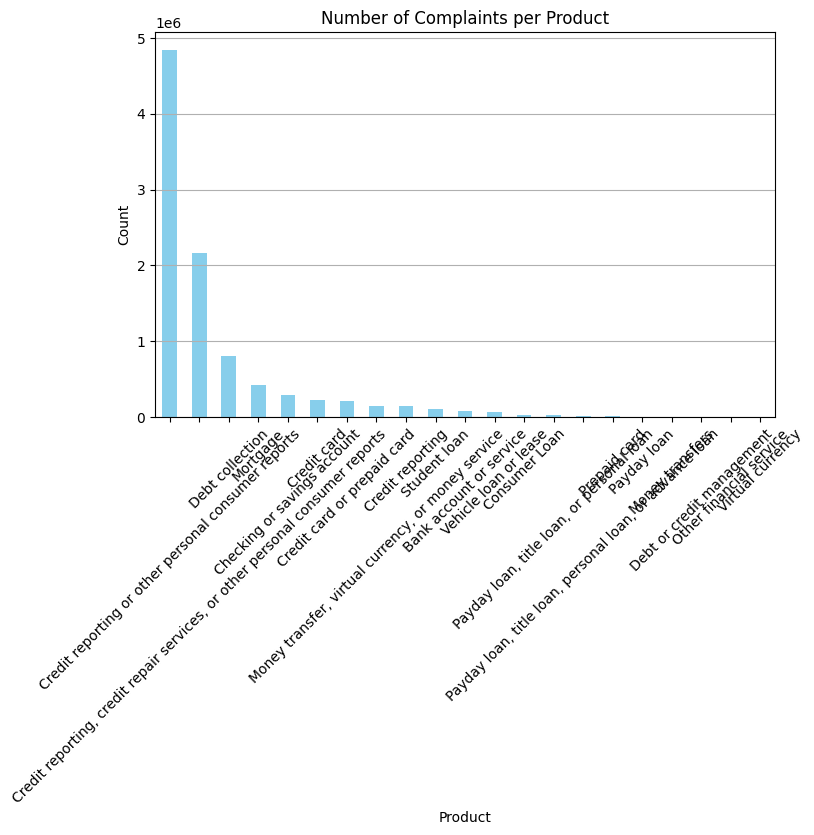

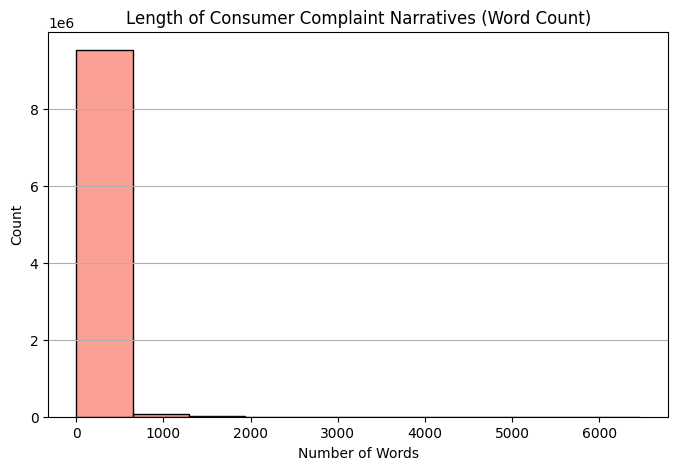

‚úÖ Complaints with narratives: 2980756
‚ùå Complaints without narratives: 6629041


In [2]:
TARGET_PRODUCTS = ['Credit card', 'Personal loan', 'Buy Now, Pay Later', 'Savings account', 'Money transfer']

filtered_df = df[
    df['Product'].isin(TARGET_PRODUCTS) &
    df['Consumer complaint narrative'].notna()
].copy()

# Clean text
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)
print("‚úÖ Cleaned and filtered dataset shape:", filtered_df.shape)

# Save filtered data
filtered_df.to_csv("filtered_complaints.csv", index=False)
print("üìÅ Saved cleaned data to filtered_complaints.csv")

‚úÖ Cleaned and filtered dataset shape: (80667, 19)
üìÅ Saved cleaned data to filtered_complaints.csv


# Task **2**

In [3]:
import pandas as pd
df = pd.read_csv('/content/filtered_complaints.csv')
print("Loaded cleaned dataset:", df.shape)

Loaded cleaned dataset: (80667, 19)


In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=50,
    separators=["\n\n", "\n", ".", "!", "?", ",", " ", ""]
)

documents = []
for i, row in df.iterrows():
    chunks = splitter.split_text(row['cleaned_narrative'])
    for chunk in chunks:
        documents.append({
            'complaint_id': row['Complaint ID'] if 'Complaint ID' in row else i,
            'product': row['Product'],
            'text': chunk
        })

print(f"üß† Total chunks generated: {len(documents)}")


üß† Total chunks generated: 371743


In [6]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
texts = [doc['text'] for doc in documents]
embeddings = model.encode(texts, show_progress_bar=True)

# Create FAISS index
dim = embeddings[0].shape[0]
index = faiss.IndexFlatL2(dim)
index.add(np.array(embeddings))

# Save index and metadata
import os
import pickle

os.makedirs("vector_store", exist_ok=True)
faiss.write_index(index, "vector_store/complaint_index.faiss")

with open("vector_store/metadata.pkl", "wb") as f:
    pickle.dump(documents, f)

print("‚úÖ Vector store saved in 'vector_store/' folder.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/11617 [00:00<?, ?it/s]

‚úÖ Vector store saved in 'vector_store/' folder.
